# Smart Quality Monitoring & Analytics System

This project visualizes manufacturing quality metrics through a Tableau dashboard powered by a dual-mode data pipeline. Users can operate in manual mode (CSV import) or automatic mode (Python-generated data).

### Import libraries

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading CSV file

In [19]:
df_quality_data = pd.read_csv('manufacturing_defect_dataset.csv')
df_quality_data.head(10)

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1
5,171,6975.931602,95.331919,1,3.914574,92.568436,19,3.027324,7.930009,0.074069,87.079118,7,1238.994421,0.118021,7.279442,171.711804,1
6,800,15889.698650,99.325486,3,4.789000,90.729911,10,3.559561,3.046889,0.040192,91.063158,8,3138.431150,0.333913,4.891669,188.727737,1
7,120,17266.779948,99.401489,4,0.743605,92.119681,13,1.604879,8.380972,0.009702,88.705569,3,1004.108554,0.293422,9.333835,312.526896,1
8,714,8202.670495,97.301422,5,3.185856,95.172937,2,3.494920,3.668747,0.058433,94.298961,4,4150.875773,0.366683,5.517451,215.680921,1
9,221,12587.790394,92.015843,2,2.425283,97.507284,0,2.633960,5.933418,0.032955,85.316362,6,3023.891555,0.317071,5.965972,364.638176,0


In [20]:
df_quality_data.tail()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
3235,762,11325.689263,89.252385,2,2.667570,87.141681,16,0.987719,3.574419,0.065727,95.917264,3,3288.043242,0.420186,4.733399,299.829577,0
3236,335,5598.837988,95.701437,4,0.751272,95.562997,11,0.178163,8.295295,0.097698,87.780846,8,2761.301593,0.126441,7.234421,245.524560,0
3237,835,11736.177712,96.431554,5,4.899756,77.973442,0,4.873429,3.844824,0.005724,81.590143,5,2000.621648,0.325530,5.436538,206.490010,1
3238,302,13664.196210,91.089782,1,4.057665,95.755591,6,0.071663,2.783298,0.042612,88.488525,6,1534.792169,0.222736,3.776924,203.771655,0
3239,355,13563.605806,83.595956,2,2.705502,94.630965,13,4.803394,5.830580,0.052978,86.010046,4,2610.526736,0.206099,2.312373,324.825754,0


# Data cleaning

Checking for null values

In [21]:
df_quality_data.isnull().sum()

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64

In [22]:
df_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [23]:
df_quality_data.shape

(3240, 17)

###  making Copy to add Batch Indexing for plotting

In [26]:
df = df_quality_data.copy()

### Add a Batch Index for plotting

In [28]:
#df['BatchIndex'] = df.index // 10
df['BatchIndex'] = range(1,len(df)+1) 

In [29]:
df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus,BatchIndex
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1,2
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1,3
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1,4
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1,5


# KPI's calculation

In [32]:
kpis = {
"Total Production Volume": df['ProductionVolume'].sum(),
"Total Production Cost": df['ProductionCost'].sum(),
"Average Defect Rate": df['DefectRate'].mean(),
"Average Quality Score": df['QualityScore'].mean(),
"Total Maintenance Hours": df['MaintenanceHours'].sum(),
"Average Downtime (%)": df['DowntimePercentage'].mean(),
"Average Worker Productivity": df['WorkerProductivity'].mean(),
"Total Safety Incidents": df['SafetyIncidents'].sum(),
"Average Energy Efficiency": df['EnergyEfficiency'].mean(),
"Total Additive Material Cost": df['AdditiveMaterialCost'].sum()
}

print('Key KPIs')
for k, v in kpis.items():
    print(f"{k}: {v:.2f}")


Key KPIs
Total Production Volume: 1777215.00
Total Production Cost: 40250579.86
Average Defect Rate: 2.75
Average Quality Score: 80.13
Total Maintenance Hours: 37184.00
Average Downtime (%): 2.50
Average Worker Productivity: 90.04
Total Safety Incidents: 14877.00
Average Energy Efficiency: 0.30
Total Additive Material Cost: 970430.15


### Save CSV dataset for Tableau

In [34]:
df.to_csv("dashboard_data.csv", index=False)

### EDA

Defect Rate Over Batches

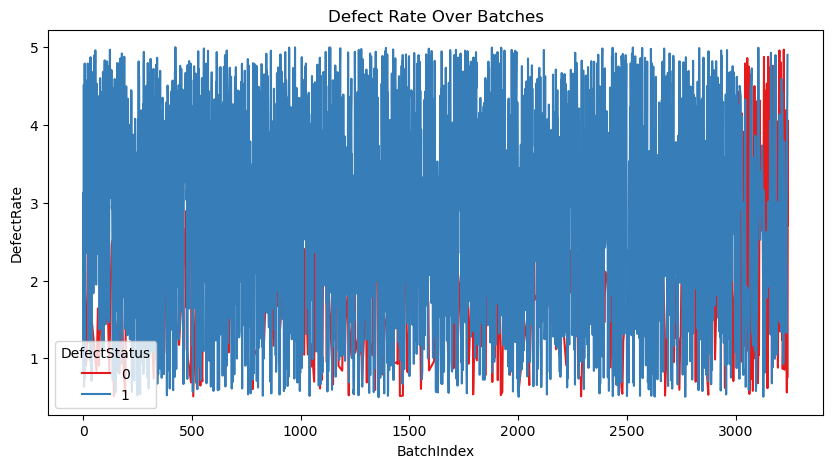

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='BatchIndex', y='DefectRate', hue='DefectStatus', palette='Set1')
plt.title("Defect Rate Over Batches")
plt.show()

Supplier Quality vs Defect Rate

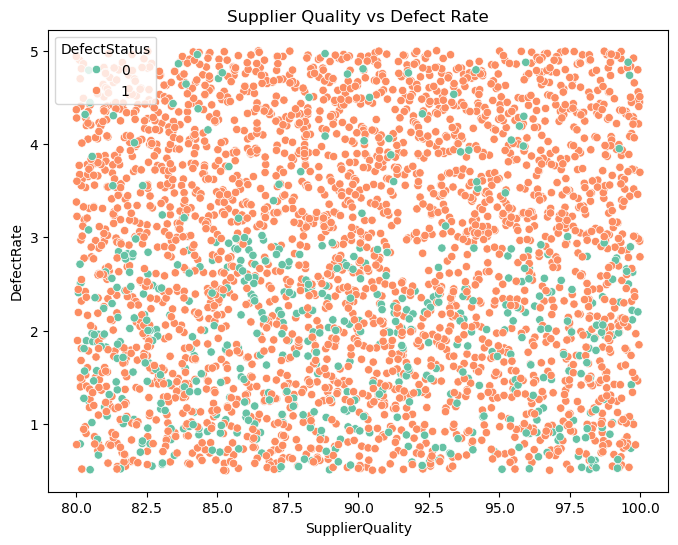

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='SupplierQuality', y='DefectRate', hue='DefectStatus', palette='Set2')
plt.title("Supplier Quality vs Defect Rate")
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='MaintenanceHours', y='DowntimePercentage')
plt.title("Maintenance Hours vs Downtime")
plt.show()